<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/03_pytorch_computer_vision.pdf) | [Watch Video Walkthrough (Chapter 92)](https://youtu.be/V_xro1bcAuA&t=50445) 

# 03. PyTorch Computer Vision

[Computer vision](https://en.wikipedia.org/wiki/Computer_vision) is the art of teaching a computer to see.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **4. Making predictions and evaluating model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictions on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

In [1]:

from IPython.display import clear_output
import torch
# example  of timestamp used in youtube
#chapter 61 at 8:41:43  hour + 3600 *(min/60) + sec
# the video ID I am watching is https://youtu.be/V_xro1bcAuA&t=timestamp
def get_timestamp(h:torch.int,m:torch.int,s:torch.int):
    return(3600 * h + (60*m) + s)
#(8. + (41/60)) * 3600 + 43


## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [2]:
#import the basic libraries we use
import torch
from torch import nn

# new torchvision stuff
import torchvision
from torchvision import datasets, models
from torchvision import transforms
from torchvision.transforms import ToTensor

# matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")
print(f"Cuda version: {torch.version.cuda}")
print(f"Is Cuda available: {torch.cuda.is_available()}")
print(f"Cuda device name: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.5.0
torchvision version: 0.20.0
Cuda version: 12.4
Is Cuda available: True
Cuda device name: NVIDIA GeForce RTX 4070 SUPER


 **Chapter 93** 14,12.04 51159  94 (14,22,48)  95 (14,27,50) 
 [Chapter 96)](https://youtu.be/V_xro1bcAuA&t=52630)


## 1. Getting a dataset  
To begin working on a computer vision problewm, let's get a dataset.

We're going to start with [FashionMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST)...

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in torchvision.datasets.

Including FashionMNIST in torchvision.datasets.FashionMNIST().

To download it, we provide the following parameters:

root: str - which folder do you want to download the data to?
train: Bool - do you want the training or test split?
download: Bool - should the data be downloaded?
transform: torchvision.transforms - what transformations would you like to do on the data?
target_transform - you can transform the targets (labels) if you like too.
Many other datasets in torchvision have these parameter options.

In [3]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data', #where to put data
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)


In [4]:
len(train_data), len(test_data                 )

(60000, 10000)

In [5]:
image,label = train_data[0]
image[:1],label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
print(f"image.shape {image.shape} ->[color_channel, height, width]")
print(f"Label: {class_names[label]}")

image.shape torch.Size([1, 28, 28]) ->[color_channel, height, width]
Label: Ankle boot


### 1.2 Visualizing our data | [Chapter 97](https://youtu.be/V_xro1bcAuA&t=53502)

Plot image as an image

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

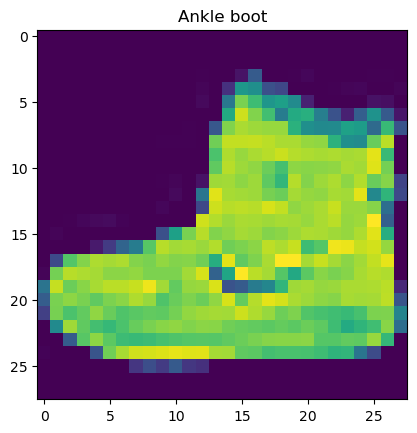

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

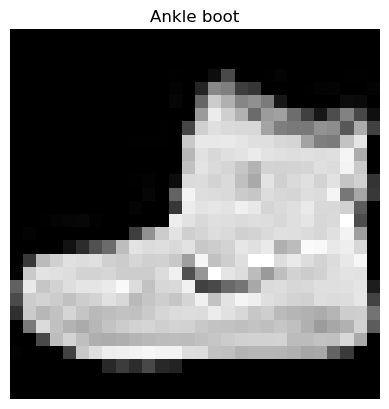

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

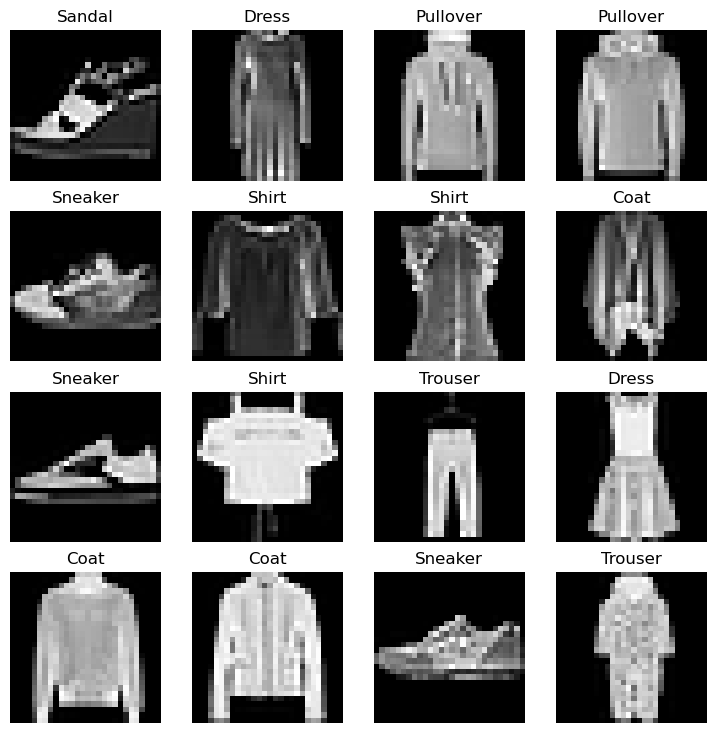

In [11]:
# plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols +1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Dataloader overview and understanding mini batches 
[Chapter 98](https://youtu.be/V_xro1bcAuA&t=54094)

Prepare dataloader

Right now our data is in the form of a pytorch dataset.
Specifically we want to turn our data into batches (or mini-batches).
We have a relatively small train dataset but in case we split it into batches for example 32 images at a time. Doing so allows the network to update gradients multiple times per epoch.

The other reason is efficiency and memory  available.

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64
train_dataloader = DataLoader(dataset=train_data,
                     batch_size=BATCH_SIZE,
                     shuffle=True) # provides more randomness per batch

test_dataloader = DataLoader(dataset=test_data,
                     batch_size=BATCH_SIZE,
                     shuffle=False) # no real need to shuffle test data

#  train_dataloader, test_dataloader

In [14]:
# What did we just create?
print(f"DataLoaders:\n   Train: {train_dataloader},\n   Test: {test_dataloader} ")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} ")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} ")

DataLoaders:
   Train: <torch.utils.data.dataloader.DataLoader object at 0x00000227BD54EA20>,
   Test: <torch.utils.data.dataloader.DataLoader object at 0x00000227BD697A70> 
Length of train_dataloader: 938 batches of 64 
Length of test_dataloader: 157 batches of 64 


In [15]:
# Check out what is inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

Image size: torch.Size([1, 28, 28])
Label: 3, size: torch.Size([])


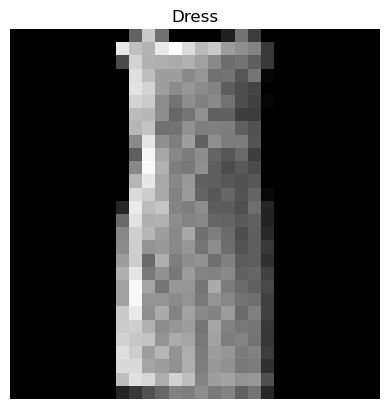

In [16]:
# Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, size: {label.shape}")



## 3.  Model 0: Creating a baseline with 2 linear layers | [chapter 100](https://youtu.be/V_xro1bcAuA&t=55277) 
A base model is a simple model which you will try to improve upon with subsequent models/experiments.  
**MAKE REVISIONS:**  rather than overwritting previous models, create new models with added complexity step by step

In [17]:
# Create a flatten layer  
# This will create a flat version of our 28,28 matrix into a single [1,28*28] tensor

flatten_model = nn.Flatten()
# Get a single sample
x = train_features_batch[0]
x_flat = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {x_flat.shape}")

# we want to send this to a linear layer that can opnly handle a single layer

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [18]:
# We need device agnistic code
#device = "cuda" if torch.cuda.is_available() else "cpu"
device="cpu"
device

'cpu'

In [19]:
IN_SHAPE = 784  #28*28 flattened image
OUT_SHAPE = len(class_names)
HIDDEN_UNITS = 16  # magic number to play with

from torch import nn
class FashionMNISTModel_V0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_shape: int,
                output_shape: int):
        super().__init__()
        self.layer_stack= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_shape),
            
            nn.Linear(in_features=hidden_shape,
                     out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

# setup model with my HParam        
model_0 = FashionMNISTModel_V0(IN_SHAPE, HIDDEN_UNITS, OUT_SHAPE).to(device)
model_0

FashionMNISTModel_V0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28]).to(device)
logit = model_0(dummy_x)
dummy_probs = torch.softmax(logit,dim=1)
#.argmax(dim=1)
dummy_pred = torch.argmax(dummy_probs, dim=1)
dummy_probs, dummy_pred.item()
#correct = torch.eq(y_true, y_pred).sum().item()

(tensor([[0.0881, 0.0963, 0.1055, 0.0657, 0.1361, 0.0792, 0.0982, 0.0766, 0.1540,
          0.1002]], grad_fn=<SoftmaxBackward0>),
 8)

In [21]:
#101 15,35,57
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0207,  0.0207,  0.0342,  ...,  0.0174, -0.0274, -0.0020],
                      [-0.0241, -0.0270, -0.0055,  ...,  0.0045,  0.0178,  0.0098],
                      [ 0.0153,  0.0220, -0.0001,  ...,  0.0051,  0.0334,  0.0303],
                      ...,
                      [ 0.0308,  0.0138,  0.0213,  ..., -0.0252,  0.0239,  0.0314],
                      [-0.0344,  0.0041,  0.0192,  ..., -0.0066,  0.0239,  0.0095],
                      [-0.0242,  0.0349, -0.0093,  ..., -0.0206, -0.0013,  0.0333]])),
             ('layer_stack.1.bias',
              tensor([ 0.0184, -0.0117,  0.0251, -0.0167, -0.0174, -0.0023, -0.0327, -0.0090,
                       0.0103,  0.0200,  0.0337, -0.0351, -0.0203, -0.0160, -0.0127,  0.0038])),
             ('layer_stack.2.weight',
              tensor([[ 0.1864, -0.0712, -0.1796,  0.0360,  0.2263, -0.0566,  0.2020, -0.0950,
                        0.1822, -0.1655, -0.0278, -0.0818, -0.2155, 

In [22]:
# a nice little tidbit to check and load additional files 
import requests
from pathlib import Path

#  download file if needed
if Path("helper_functions.py").is_file():
      print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [23]:
from helper_functions import accuracy_fn

# set up loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                           lr=0.1)

### 3.2 Creating a function to time our experiments |  [chapter 102](https://youtu.be/V_xro1bcAuA&t=56787) 

Machine learning is very experimental

Two of the main things you'll want to track are:
1. Model's performance (loss accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     stop: float,
                     device: torch.device = None):
    """ Prints difference between start and stop times 
    return: The time in millseconds of runtime
    """
    total_time_ms = (stop - start) * 1000
    print(f"Train time on device {device}: {total_time_ms:.3f} milliseconds")
    return total_time_ms

In [25]:
start_time = timer()
# some code
stop_time = timer()
print_train_time(start_time, stop_time, device)

Train time on device cpu: 0.017 milliseconds


0.016600009985268116

In [26]:
# better Timer than above
import time

class Timer():
    def __init__(self,dev :str = "unspecified"):
        self.device = dev
    
    def __enter__(self):
        self.start_time = time.time()  # Take the initial snapshot of time
        
        return self  # Return the instance for optional use in the `with` block

    def __exit__(self, exc_type, exc_value, traceback):
        self.end_time = time.time()  # Take the snapshot of time when exiting the context
        self.elapsed_time = self.end_time - self.start_time  # Calculate elapsed time
        print(f"Elapsed time on {self.device} device: {self.elapsed_time:.4f} seconds")
        # If needed, handle exceptions (return False to propagate exceptions)
        return False

In [27]:
with Timer() as t:
    for i in range(1,1000):
        if i% 1000 == 0:
            pass

print(f"Timed out of loop: {t.elapsed_time}")

Elapsed time on unspecified device: 0.0000 seconds
Timed out of loop: 0.0


### 3.3 Creating a training loop for batched data |  [chapter 103](https://youtu.be/V_xro1bcAuA&t=57121)
**Note:** the optimizer will update model's parameters once per batch ... i.e. Many times per epoch
1. Loop through epochs
2. Loop thru training batches, perform training steps, calculate the train loss per batch
3. Loop thru testing batches, perform test steps, calculate the loss per batch
4. Print out whats' happinin'
5. Time it all (for fun)

In [28]:
# assumption is all preparations have been made cuz the timer is running
def train_loop(epochs: int):
    # create
    for epoch in tqdm(range(epochs)):
        print(f"epoch: {epoch}\n----")
        #Training
        train_loss = 0 # add all batch losses, divide by num batches to get average epoch loss
        #add a loop to loop thru batches
        for batch, (X,targets) in enumerate(train_dataloader):
            model_0.train()
            # 1. forward pass
            train_logits = model_0(X)
            train_probs = torch.softmax(train_logits,dim=1)
            #.argmax(dim=1)
            train_preds = torch.argmax(train_probs, dim=1)
            # 2. Calculate the loss (per Batch)
            loss = loss_fn(train_logits, targets)
            train_loss += loss
            # last 3  basic steps
            optimizer.zero_grad()
            loss.backward()
            # step what params
            optimizer.step()

            #print
            if batch % 400 == 0:
                print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
        # Divide total train loss by length of train dataloader
        train_loss /= len(train_dataloader) # num of batches

        # Testing
        test_loss, test_acc = 0, 0
        model_0.eval()
        with torch.inference_mode():
            for X_test, test_targets in test_dataloader:  # test batches
                # 1. forward pass
                test_logits = model_0(X_test)

                # 2. Calculate the loss (per Batch)
                test_loss = loss_fn(test_logits, test_targets)
                # last 3 - 5 training steps not needed in test loop
                
                # Calculate accuracy
                # Accuracy needs labels to labels
                test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)
                test_acc += accuracy_fn(y_true=test_targets,
                                       y_pred= test_preds)

            # Calculate test loss average per batch
            test_loss /= len(test_dataloader)
            # calculate the acc average per batch
            test_acc /=len(test_dataloader)

        # Print out whats' happinin'
        #print(f"EPOCH: {epoch} | Loss: {train_loss:.4f}, Acc: {acc:.2f}%  | Test loss: {test_loss:.5f}, acc: {test_acc:.2f}%")
        print(f"EPOCH: {epoch} | Loss: {train_loss:.4f}  | Test loss: {test_loss:.5f}, acc: {test_acc:.2f}%")
        
    # Calculate train time
    #  My class handles this automatically

In [29]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# set seed and start timer
torch.manual_seed(42)
# set epochs small for faster training time
epochs = 3
with Timer(device) as timer: #optional parameter for listing device used
    train_loop(epochs)
total_train_time_model_0 = timer.elapsed_time

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
----
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
EPOCH: 0 | Loss: 0.6271  | Test loss: 0.00175, acc: 81.47%
epoch: 1
----
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
EPOCH: 1 | Loss: 0.4805  | Test loss: 0.00176, acc: 81.56%
epoch: 2
----
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
EPOCH: 2 | Loss: 0.4532  | Test loss: 0.00215, acc: 82.83%
Elapsed time on cpu device: 10.3057 seconds


## 4. Make prediction and get model_0 results  
[Chapter 104](https://youtu.be/V_xro1bcAuA&t=58696)

In [30]:
torch.manual_seed(42)
def eval_model(model:nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device = 'cpu'):
    """Returns a dictionary containing the results of model predicting on data_loader.
    
    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
    
    Returns:
        (dict): Results of model making predictions on data_loader.
    """   
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
             # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))
            
        # Scale loss and acc to get the average per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc,
            "device" : device }



In [31]:
# Calculate model_0 results on test dataset
# note: loss function should be CrossEntropy for this model
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
                            loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/157 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_V0',
 'model_loss': 0.49337315559387207,
 'model_acc': 82.83240445859873,
 'device': 'cpu'}

## 5. Setup device-agnostic code 

[chapter 105](https://youtu.be/V_xro1bcAuA&t=59187) 

In [32]:
# We need device agnistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
#device="cpu"
device

'cuda'

## 6. Building a better model with non-linearity
[chapter 106](https://youtu.be/V_xro1bcAuA&t=59415)


In [33]:
IN_SHAPE = 784  #28*28 flattened image
OUT_SHAPE = len(class_names)
HIDDEN_UNITS = 16  # magic number to play with

from torch import nn
class FashionMNISTModel_V1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_shape: int,
                output_shape: int):
        super().__init__()
        self.layer_stack= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                     out_features=hidden_shape),
            #nn.ReLU(),
            #nn.Linear(in_features=hidden_shape,
            #         out_features=hidden_shape),
            nn.ReLU(),
            nn.Linear(in_features=hidden_shape,
                     out_features=output_shape),
            nn.ReLU()


        )

    def forward(self,x):
        return self.layer_stack(x)



In [34]:
# setup model with my HParam        
model_1 = FashionMNISTModel_V1(IN_SHAPE, HIDDEN_UNITS, OUT_SHAPE)
model_1

FashionMNISTModel_V1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 Setup loss, optimizer and evaluation metrics |[chapter 107](https://youtu.be/V_xro1bcAuA&t=59958)

In [35]:
from helper_functions import accuracy_fn

# set up loss and optimizer
loss_fn_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), 
                           lr=0.1)

### 6.2 functionalizing train, test loops
[chapter 108](https://youtu.be/V_xro1bcAuA&t=60143)

In [36]:
"""
Training loop function
"""
def train_step(model:nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device 
              ):
    train_loss, train_acc = 0, 0

    # get all data  on device
    model.to(device)
        
    for batch, (X,targets) in enumerate(data_loader):
        X ,targets = X.to(device), targets.to(device)

        model.train()
        # 1. forward pass
        train_pred = model(X)
        
        # 2. Calculate the loss (per Batch)
        loss = loss_fn(train_pred, targets)
        train_loss += loss
        train_acc += accuracy_fn(y_true=targets,
                                 y_pred= train_pred.argmax(dim=1))
        
        
        # Optimizer.zero_grad
        optimizer.zero_grad()
        
        # 4. loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss and accuracy by length of number of batches
    train_loss /= len(data_loader) 
    train_acc /= len(data_loader) 
    print(f"Train Loss: {train_loss:.4f}  | Train accuracy: {train_acc:.2f}%")



### 6.3 functionalizing test loops
[chapter 109](https://youtu.be/V_xro1bcAuA&t=60653)

In [37]:
"""
Test loop function
"""
def test_step(model:nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # turn on inference context manager
    with torch.inference_mode():
        for X, targets in data_loader:  # test batches
            X = X.to(device)
            targets = targets.to(device)
            # 1. forward pass
            test_pred = model(X)

            # 2. Calculate the loss and accuracy
            test_loss += loss_fn(test_pred, targets)
            # Calculate accuracy
            test_acc += accuracy_fn(y_true=targets,
                y_pred= test_pred.argmax(dim=1) # logits to labels
            )
 
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /=len(data_loader)
        print(f"Test loss: {test_loss:.4f}  | Test accuracy: {test_acc:.2f}%")


### 6.4 Model 1: Training and testing with our train and test step functions
[chapter 110](https://youtu.be/V_xro1bcAuA&t=61050)
get_timestamp(16,57,30)

In [38]:
# Import tqdm for progress bar DOESN't work in notebook for some reason
from tqdm.auto import tqdm
# Timer class is now implemented in helper_functions
from helper_functions import accuracy_fn
from helper_functions import get_timer
# set seed and start timer
torch.manual_seed(42)
# set epochs small for faster training time

train_dataloader.dataset.data.to(device)
#test_dataloader = test_dataloader.to(device)

epochs = 3
with get_timer(device) as timer: #optional parameter for listing device used
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n---------")
        train_step(data_loader=train_dataloader, 
            model=model_1, 
            loss_fn=loss_fn_1,
            optimizer=optimizer_1,
            accuracy_fn=accuracy_fn
        )
        test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn_1,
            accuracy_fn=accuracy_fn
        )
total_train_time_model_1 = timer.elapsed_time

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 1.1834  | Train accuracy: 62.99%
Test loss: 0.9312  | Test accuracy: 70.78%
Epoch: 1
---------
Train Loss: 0.8903  | Train accuracy: 71.28%
Test loss: 0.9148  | Test accuracy: 70.38%
Epoch: 2
---------
Train Loss: 0.8554  | Train accuracy: 72.00%
Test loss: 0.8699  | Test accuracy: 71.60%
Elapsed time on cuda device: 12.0146 seconds


### 6.5 Evaluating Model 1 device-agnostic eval_model |[chapter 111](https://youtu.be/V_xro1bcAuA&t=61763)

I already fixed this in the original version

In [39]:
# Calculate model_0 results on test dataset
# note: loss function should be CrossEntropy for this model
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
                            loss_fn=loss_fn, accuracy_fn=accuracy_fn,
                             device= device
)
print(model_0_results)

model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
                            loss_fn=loss_fn_1, accuracy_fn=accuracy_fn,
                             device= device
)
print(model_1_results)

  0%|          | 0/157 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_V0', 'model_loss': 0.49337321519851685, 'model_acc': 82.83240445859873, 'device': 'cuda'}


  0%|          | 0/157 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_V1', 'model_loss': 0.8699366450309753, 'model_acc': 71.59633757961784, 'device': 'cuda'}


In [40]:
total_train_time_model_0,total_train_time_model_1


(10.305715084075928, 12.014638900756836)

In [41]:
!nvidia-smi


Thu Nov 14 12:05:22 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   34C    P8              9W /  220W |    1118MiB /  12282MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 7. Model 2 Building a convolutional model  [chapter 112](https://youtu.be/V_xro1bcAuA&t=62012)  

Time to create a Convolutional Neural Network better know as a CNN (also know as ConvNet).
We will duplicate the TinyVGG model depicted on [cnn explainer](https://poloclub.github.io/cnn-explainer/)

In [42]:
# Create device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [43]:
# Create a convolution neural network
class FashionMNISTModel_V2(nn.Module):
    """
    Model archicture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d( in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d( in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride is same as kernel size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        ) 

        # to figure out the input shape for the linear layer since each layer above shrinks
        # the image down, run a test image throught the first 2 layers and multiply the shape values together
        self.classifier = nn.Sequential(
            nn.Flatten(), # default is dim=1, makes sense when we want to flatten an image but leave the color(zero dim alone)
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )

    
    # change this to fusion code to make gpu go brrr    
    def forward(self, x: torch.Tensor):
        return self.classifier(self.block_2(self.block_1(x)))
        #print(f"shape being passed to block_1: {x.shape}")
        #x = self.block_1(x)
        #print(f"shape being passed to block_2: {x.shape}")        
        #x = self.block_2(x)
        #print(f"shape being passed to block_3: {x.shape}")        
        #x = self.block_3(x)
        #print(f"shape being passed to classifier: {x.shape}")
        #x = self.classifier(x)
        #print(x.shape)
        #return x


In [44]:

torch.manual_seed(42)
model_2 = FashionMNISTModel_V2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)

model_2

FashionMNISTModel_V2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Nice!

Our biggest model yet!

What we've done is a common practice in machine learning.

Find a model architecture somewhere and replicate it with code. 

### 7.1 Stepping through `nn.Conv2d()`

We could start using our model above and see what happens but let's first step through the two new layers we've added:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a convolutional layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a max pooling layer.

> **Question:** What does the "2d" in `nn.Conv2d()` stand for?
>
> The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.
>
> For other dimensional data (such as 1D for text or 3D for 3D objects) there's also `nn.Conv1d()` and `nn.Conv3d()`. 

To test the layers out, let's create some toy data just like the data used on CNN Explainer.

In [45]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [46]:
torch.manual_seed(42)

#Create a CNN with the same dimensionas TinyVGG

conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=0) # also try using "valid" or "same" here 
out =conv_layer(test_image)
test_image.shape, out.shape

(torch.Size([3, 64, 64]), torch.Size([10, 62, 62]))

In [47]:
conv_layer.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.1471,  0.1597, -0.0451],
                        [ 0.1768, -0.0422,  0.0388],
                        [-0.0937,  0.1130,  0.1697]],
              
                       [[-0.1412,  0.1673,  0.0360],
                        [ 0.1422,  0.0261,  0.0928],
                        [-0.0272,  0.1484,  0.0284]],
              
                       [[-0.0898,  0.0491, -0.0887],
                        [-0.0226, -0.0782,  0.1277],
                        [-0.1519, -0.0887, -0.0543]]],
              
              
                      [[[-0.1157,  0.0182, -0.1901],
                        [ 0.1738, -0.1635,  0.1486],
                        [ 0.0320, -0.0625,  0.1189]],
              
                       [[ 0.0300,  0.1555,  0.0210],
                        [-0.0607,  0.0517, -0.0522],
                        [ 0.0810,  0.1718,  0.1112]],
              
                       [[-0.0841,  0.1111,  0.0344],
                        [ 0.0977

In [48]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer weight shape: \n{conv_layer.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer bias shape: \n{conv_layer.bias.shape} -> [out_channels=10]")

conv_layer weight shape: 
torch.Size([10, 3, 3, 3]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer bias shape: 
torch.Size([10]) -> [out_channels=10]


### 7.2 Stepping through `nn.MaxPool2d()` [chapter 115](https://youtu.be/V_xro1bcAuA&t=64606)  

Now let's check out what happens when we move data through `nn.MaxPool2d()`.

In [49]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# newer versions of Conv2d accept either a batch of images or a single image# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# now pass the data thru the maxpool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after passing through the maxPool layer: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after passing through the maxPool layer: torch.Size([1, 10, 31, 31])


Notice the change in the shapes of what's happening in and out of a `nn.MaxPool2d()` layer.

The `kernel_size` of the `nn.MaxPool2d()` layer will affect the size of the output shape.

In our case, the shape halves from a `62x62` image to `31x31` image.

Let's see this work with a smaller tensor.

In [50]:
torch.manual_seed(42)
# Create a random tensor with similiar number of dimension to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random_tensor:\n{random_tensor}")
print(f"Random_tensor shape :{random_tensor.shape}")

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random_tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random_tensor shape :torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2` | [chapter 117](https://youtu.be/V_xro1bcAuA&t=66383)

We've stepped through the layers in our first CNN enough.

But remember, if something still isn't clear, try starting small.

Pick a single layer of a model, pass some data through it and see what happens.

Now it's time to move forward and get to training!

Let's setup a loss function and an optimizer.

We'll use the functions as before, `nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification data).

And `torch.optim.SGD()` as the optimizer to optimize `model_2.parameters()` with a learning rate of `0.1`.

In [51]:
# Setup loss function/eval metrics/optimizer
from tqdm.auto import tqdm
# Timer class is now implemented in helper_functions
from helper_functions import accuracy_fn,get_timer
# Setup loss and optimizer
loss_fn_2 = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [52]:
list(model_2.parameters())[0].device

device(type='cuda', index=0)

In [53]:
image_v2,label = train_data[2]
print(f"image_v2.shape: {image_v2.shape}")
print(f"model is loaded on {list(model_2.parameters())[0].device}")
print(f"image_v2 is on {image_v2.device}")

#test_image.to(device)
pred = model_2 (image_v2.unsqueeze(dim=0).to(device))
#print (f"\n{pred}")
#plt.imshow(pred[0].detach().to('cpu'), cmap="gray")
#plt.title(class_names[label])

image_v2.shape: torch.Size([1, 28, 28])
model is loaded on cuda:0
image_v2 is on cpu


In [54]:
#print (model_2.image_block_1.shape)
#plt.imshow(model_2.image_block_1[9].to('cpu'), cmap="gray")

#print (model_2.image_block_2.shape)
#plt.imshow(model_2.image_block_2[0].to('cpu'), cmap="gray")

#print (model_2.image_classifier.shape)
#plt.imshow(model_2.image_classifier.to('cpu'), cmap="gray")

print(pred,label)

#plt.title(class_names[label])

tensor([[ 0.0331, -0.0580,  0.0459, -0.0272, -0.0128,  0.0179, -0.0063, -0.0118,
          0.0302,  0.0110]], device='cuda:0', grad_fn=<AddmmBackward0>) 0


### 7.3 Using train and test step functions to train model | [chapter 118](https://youtu.be/V_xro1bcAuA&t=66542)

In [55]:

# set seed and start timer
#torch.manual_seed(42)

#train_dataloader.dataset.data.to(device)

model_2.to(device)
epochs = 3
with get_timer(device) as timer: #optional parameter for listing device used
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n---------")
        train_step(data_loader=train_dataloader, 
            model=model_2, 
            loss_fn=loss_fn_2,
            optimizer=optimizer_2,
            accuracy_fn=accuracy_fn
        )
        test_step(data_loader=test_dataloader,
            model=model_2,
            loss_fn=loss_fn_2,
            accuracy_fn=accuracy_fn
        )
total_train_time_model_2 = timer.elapsed_time
print (f"Total train time {total_train_time_model_2} on device; {device}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.7264  | Train accuracy: 73.42%
Test loss: 0.5066  | Test accuracy: 81.94%
Epoch: 1
---------
Train Loss: 0.3859  | Train accuracy: 86.09%
Test loss: 0.3744  | Test accuracy: 87.06%
Epoch: 2
---------
Train Loss: 0.3439  | Train accuracy: 87.67%
Test loss: 0.3599  | Test accuracy: 86.89%
Elapsed time on cuda device: 14.3578 seconds
Total train time 14.357758283615112 on device; cuda


In [56]:

# Get results for model 2
model_2_results = eval_model(model=model_2, data_loader=test_dataloader,
                             loss_fn=loss_fn_2, accuracy_fn=accuracy_fn,
                             device=device
)
print( model_2_results)

  0%|          | 0/157 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_V2', 'model_loss': 0.35992810130119324, 'model_acc': 86.89291401273886, 'device': 'cuda'}


In [57]:
print( model_0_results)
print( model_1_results)
print( model_2_results)

{'model_name': 'FashionMNISTModel_V0', 'model_loss': 0.49337321519851685, 'model_acc': 82.83240445859873, 'device': 'cuda'}
{'model_name': 'FashionMNISTModel_V1', 'model_loss': 0.8699366450309753, 'model_acc': 71.59633757961784, 'device': 'cuda'}
{'model_name': 'FashionMNISTModel_V2', 'model_loss': 0.35992810130119324, 'model_acc': 86.89291401273886, 'device': 'cuda'}


### 7.4 Comparing results of our modelling experiments | [chapter 119](https://youtu.be/V_xro1bcAuA&t=67017)


In [58]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc,device
0,FashionMNISTModel_V0,0.493373,82.832404,cuda
1,FashionMNISTModel_V1,0.869937,71.596338,cuda
2,FashionMNISTModel_V2,0.359928,86.892914,cuda


In [59]:
# Add training time to result comparision
compare_results["training_time"] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,device,training_time
0,FashionMNISTModel_V0,0.493373,82.832404,cuda,10.305715
1,FashionMNISTModel_V1,0.869937,71.596338,cuda,12.014639
2,FashionMNISTModel_V2,0.359928,86.892914,cuda,14.357758


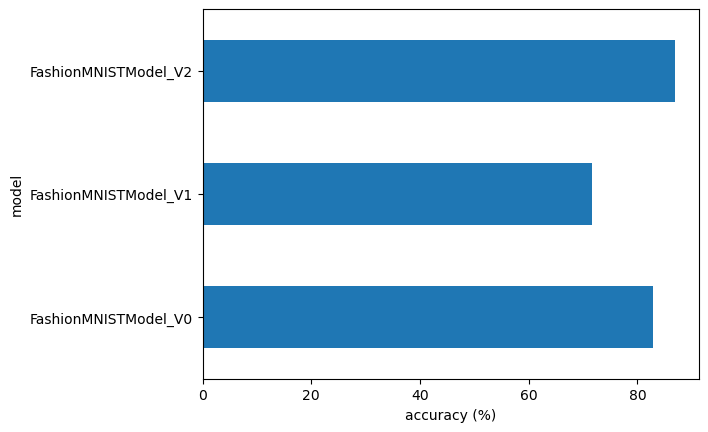

In [60]:
# visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Making Predictions on random test samples with the best trained model | [Chapter 120](https://youtu.be/V_xro1bcAuA&t=67463) 


In [61]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare sample (add a batch dimension and pass to device)
            sample = torch.unsqueeze(sample,dim=0).to(device)

            # Forward pass
            pred_logit = model(sample)

            # Get prediction probablilty
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

            # Get pred_prob off the gpu for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [62]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

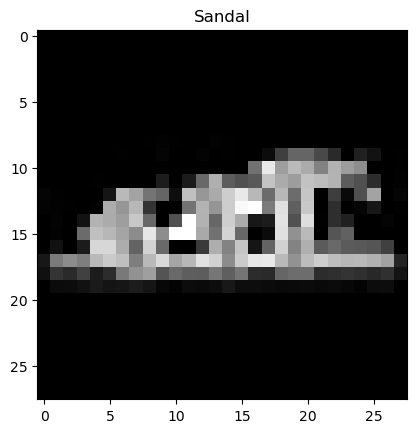

In [63]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [64]:
# Make prediction
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

# View the first 2 prediction probabilities
pred_probs[:4]

tensor([[9.4565e-05, 1.9187e-06, 1.1317e-04, 4.5653e-06, 7.7565e-06, 9.9727e-01,
         6.8336e-05, 6.1182e-04, 1.7601e-03, 6.8801e-05],
        [4.7047e-03, 1.3399e-03, 6.4965e-01, 9.2763e-03, 2.9593e-01, 2.4549e-06,
         3.4480e-02, 2.7922e-05, 4.5696e-03, 1.7666e-05],
        [2.4427e-03, 1.6273e-04, 2.3283e-01, 9.8124e-05, 3.2788e-01, 3.5180e-05,
         4.2717e-01, 2.6506e-04, 8.7679e-03, 3.4677e-04],
        [9.9400e-04, 6.9967e-05, 1.6665e-01, 4.0880e-05, 8.0743e-01, 4.6193e-05,
         2.4610e-02, 5.5840e-06, 1.3462e-04, 1.8789e-05]])

In [65]:
# convert predictions probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 2, 6, 4, 1, 1, 8, 5, 9])

In [66]:
test_labels

[5, 2, 4, 4, 1, 1, 8, 5, 9]

### 9.1 Plotting our best model predictions on the test set and evaluating them
[Chapter 121](https://youtu.be/V_xro1bcAuA&t=68162)

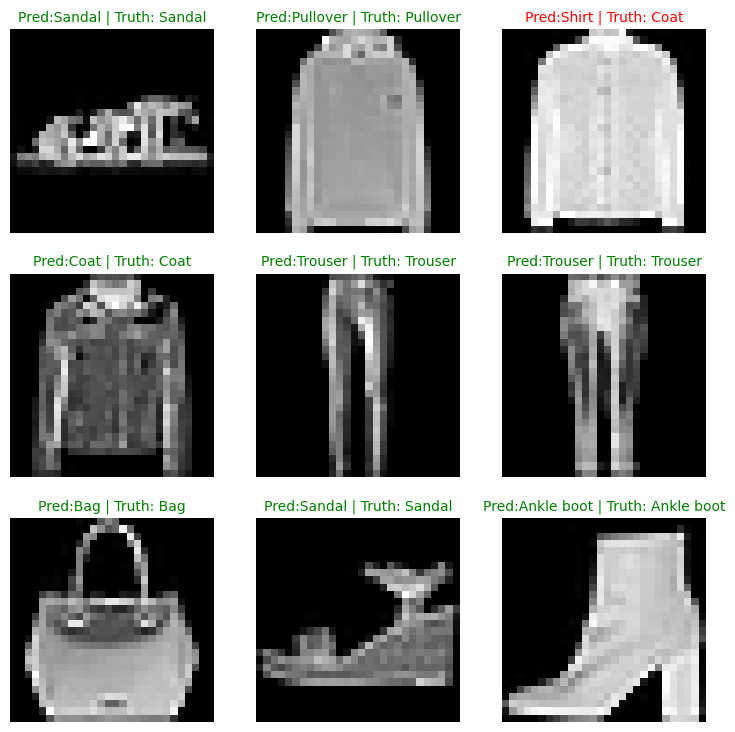

In [67]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # find the prediction (in text form)
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title
    title_text = f"Pred:{pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') # Green text if prediction was correct
    else:
        plt.title(title_text, fontsize=10, c='r') # Red text for incorrect prediction

    plt.axis(False)
    

## 10. Making a confusion matrix for further prediction evaluation

Making predictions across whole test dataset and importing libraries to plot a confusion matrix | [Chapter 122](https://youtu.be/V_xro1bcAuA&t=68653)
A confusion matrix is a fantastic way of evaluating your classification model

1. Make Predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

from command promp in correct virtual environment

conda install -c conda-forge torchmetrics
conda install -c conda-forge mlxtend

In [68]:
# Import tqdm.auto   doesn't work in jupyter
from tqdm.auto import tqdm
import torchmetrics
import mlxtend

print(torchmetrics.__version__)
# 1. Make predictions with traind model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

# Concatenate into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:5]
        

1.5.1


Making predictions...:   0%|          | 0/157 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6])

In [69]:
y_pred_tensor,test_data.targets


(tensor([9, 2, 1,  ..., 8, 1, 7]), tensor([9, 2, 1,  ..., 8, 1, 5]))

[Chapter 123](https://youtu.be/V_xro1bcAuA&t=69574)

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

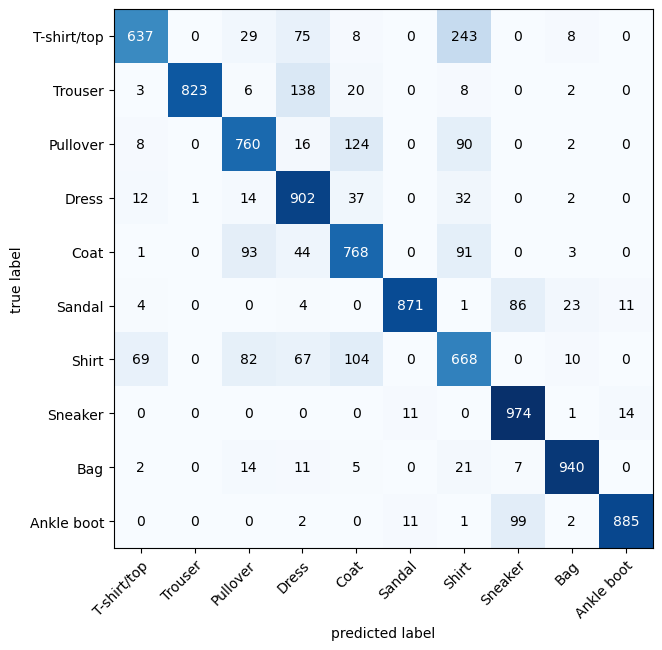

In [70]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup Confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

#3.Plot the matrix from mlxtend
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)
fig, ax

## 11. Save and load best performing model. [Chapter 124](https://youtu.be/V_xro1bcAuA&t=69990)

In [71]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.3035,  0.3717, -0.0720],
                        [ 0.3824,  0.2686,  0.2914],
                        [-0.2205,  0.3498,  0.3426]]],
              
              
                      [[[-0.3485,  0.5448,  0.1001],
                        [ 0.2753,  0.5389,  0.3003],
                        [ 0.0164,  0.5449,  0.0625]]],
              
              
                      [[[-0.1722,  0.0399, -0.1291],
                        [-0.3669, -0.4196,  0.1362],
                        [-0.5547, -0.4844, -0.2050]]],
              
              
                      [[[-0.3432, -0.3156, -0.5565],
                        [ 0.4431, -0.3639,  0.3226],
                        [ 0.3571, -0.0423,  0.4187]]],
              
              
                      [[[-0.0829,  0.3368, -0.0314],
                        [-0.1606,  0.3313, -0.1321],
                        [ 0.1818,  0.5560,  0.2153]]],
              
              
           

In [72]:
from pathlib import Path

# 1. Create models directory   (already exists... do I need to do this step?)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create the model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the models state_dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")

# only saves the models learned parameters, rebuilding the matrix required the code above
# Things I need, model class (loss_fn and optimizers need be the same?)
torch.save(obj=model_2.state_dict(),
          f=MODEL_SAVE_PATH)
# a measly 34.8 KB (35.634 bytes) file compare that to the gpts models

Saving the model to: models\03_pytorch_computer_vision_model_2.pth


In [73]:
# Check the saved file path
# Linux
#!ls -l models/\03_pytorch_computer_vision_model_2.pth
#Windows
!dir -l models\\\03_pytorch_computer_vision_model_2.pth

 Volume in drive C is Windows
 Volume Serial Number is C6A3-7E19

 Directory of C:\Users\Ronald\Documents\pytorch4DeepLearning


 Directory of C:\Users\Ronald\Documents\pytorch4DeepLearning\models

14/11/2024  12:05            35.634 03_pytorch_computer_vision_model_2.pth
               1 File(s)         35.634 bytes
               0 Dir(s)  855.692.206.080 bytes free


File Not Found


### 11.1 Loading it back in   DON'T lose or change the class definition 

In [74]:
model_2_reloaded = FashionMNISTModel_V2(input_shape=1,
                                       hidden_units=10,
                                       output_shape=len(class_names))

# load in the saved state_dict
model_2_reloaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH,
                                           weights_only=True))
# default is weights_only = False which is unsafe, 
# any arbitrary code can be loaded and executed
# This limits the functions that could be executed during unpickling. 
# Arbitrary objects will no longer be allowed to be loaded via this mode 
# unless they are explicitly allowlisted by the user 
# via `torch.serialization.add_safe_globals`. 
# We recommend you start setting `weights_only=True` for any use case 
# where you don't have full control of the loaded file. 
model_2_reloaded.to(device)

FashionMNISTModel_V2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [75]:
# use model as above evaluating
model_2_results

{'model_name': 'FashionMNISTModel_V2',
 'model_loss': 0.35992810130119324,
 'model_acc': 86.89291401273886,
 'device': 'cuda'}

In [76]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2_reloaded_results = eval_model(
    model=model_2_reloaded,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_reloaded_results

  0%|          | 0/157 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_V2',
 'model_loss': 0.35992810130119324,
 'model_acc': 86.89291401273886,
 'device': 'cuda'}

We can find out if two tensors are close to each other using `torch.isclose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).

If our model's results are close, the output of `torch.isclose()` should be true.

In [77]:
# Check to see it the results are close to each other (if they are far off, there may be an error)
torch.isclose(torch.tensor(model_0_results["model_loss"]),
             torch.tensor(model_2_reloaded_results["model_loss"]),
             atol=1e-08, # absolute tolerance, if needed, the default may be fine
             rtol=0.0001 # relative error, again if needed to loosen up "closeness"
             )

tensor(False)

## Exercises
### Pytorch computer vision summary and extra-curriculum | [Chapter 125](https://youtu.be/V_xro1bcAuA&t=70678)


Check the deeo_learning_main notebook 3 for details or 

**Resources:**
* [Exercise template notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb)
* [Example solutions notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb) (try the exercises *before* looking at this)

Things to try:
1. 

In [78]:
import torch
torch.__version__
import numpy
numpy.__version__


'1.26.0'

In [79]:
import os
from os.path import exists
import torch
import torch.nn as nn
from torch.nn.functional import log_softmax, pad
import math
import copy
import time
from torch.optim.lr_scheduler import LambdaLR
import pandas as pd
import altair as alt
#from torchtext.data.functional import to_map_style_dataset
from torch.utils.data import DataLoader
from torchtext.vocab import build_vocab_from_iterator
import torchtext.datasets as datasets
import spacy
import GPUtil
import warnings
from torch.utils.data.distributed import DistributedSampler
import torch.distributed as dist
import torch.multiprocessing as mp
from torch.nn.parallel import DistributedDataParallel as DDP


# Set to False to skip notebook execution (e.g. for debugging)
warnings.filterwarnings("ignore")
RUN_EXAMPLES = True